# Data preprocessing and split

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.13.0


In [36]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data.dropna()
regression_data = data.loc[data['Knocking'] == 0]
regression_data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
547,546.0,2000,-10,30,283,0.975,288.8,1.069,858.7,36.89,39.8,27.96,1.33,8.67,10.1,307.4,2.91,222.7,0.0,0.0
548,547.0,2000,-10,30,293,0.974,295.5,1.068,858.6,36.61,39.5,27.48,1.32,8.6,9.98,307.2,2.99,220.9,0.0,0.0
549,548.0,2000,-10,30,303,0.974,302.3,1.067,858.1,36.35,39.2,27.62,1.31,8.53,9.86,307.5,3.03,221.4,0.0,0.0
550,549.0,2000,-10,35,283,0.982,288.8,1.07,861.2,37.35,40.9,27.25,1.39,8.82,10.31,304.4,3.23,215.2,0.0,0.0
551,550.0,2000,-10,35,293,0.982,295.6,1.069,858.9,37.1,40.6,27.41,1.39,8.75,10.19,306.1,3.09,221.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [37]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case                             1064 non-null   float64
 1   Engine Speed                     1064 non-null   object 
 2   Spark Timing                     1064 non-null   object 
 3   Throttle Angle                   1064 non-null   object 
 4   Ambient Temperature              1064 non-null   object 
 5   Intake Pressure                  1064 non-null   object 
 6   Intake Temperature               1064 non-null   object 
 7   Exhaust Pressure                 1064 non-null   object 
 8   Exhaust Temperature              1064 non-null   object 
 9   Injected Mass                    1064 non-null   object 
 10  Maximum Pressure                 1064 non-null   object 
 11  Crank Angle at Maximum Pressure  1064 non-null   object 
 12  Maximum Rate of Pressur

In [38]:
input_data = regression_data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
input_data
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Engine Speed         1064 non-null   object
 1   Spark Timing         1064 non-null   object
 2   Throttle Angle       1064 non-null   object
 3   Ambient Temperature  1064 non-null   object
 4   Intake Pressure      1064 non-null   object
 5   Intake Temperature   1064 non-null   object
 6   Exhaust Pressure     1064 non-null   object
 7   Exhaust Temperature  1064 non-null   object
 8   Injected Mass        1064 non-null   object
dtypes: object(9)
memory usage: 83.1+ KB


In [39]:
output_data = regression_data.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17]]
output_data
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Maximum Pressure                 1064 non-null   object
 1   Crank Angle at Maximum Pressure  1064 non-null   object
 2   Maximum Rate of Pressure Rise    1064 non-null   object
 3   BMEP                             1064 non-null   object
 4   IMEP                             1064 non-null   object
 5   BSFC                             1064 non-null   object
 6   BSNOx                            1064 non-null   object
 7   BSCO                             1064 non-null   object
dtypes: object(8)
memory usage: 74.8+ KB


In [40]:
input_data=input_data.astype('float')
output_data = output_data.astype('float')
input_data.info()
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine Speed         1064 non-null   float64
 1   Spark Timing         1064 non-null   float64
 2   Throttle Angle       1064 non-null   float64
 3   Ambient Temperature  1064 non-null   float64
 4   Intake Pressure      1064 non-null   float64
 5   Intake Temperature   1064 non-null   float64
 6   Exhaust Pressure     1064 non-null   float64
 7   Exhaust Temperature  1064 non-null   float64
 8   Injected Mass        1064 non-null   float64
dtypes: float64(9)
memory usage: 83.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Maximum Pressure                 1064 non-null   float64
 1   Crank Angle 

In [41]:
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, shuffle = True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42)
print(train_input.shape, train_output.shape)
print(val_input.shape, val_output.shape)
print(test_input.shape, test_output.shape)


(638, 9) (638, 8)
(213, 9) (213, 8)
(213, 9) (213, 8)


In [42]:
print(test_output.index)

Index([ 578, 2135, 1282, 1743, 1854, 1499, 1510, 1522,  746, 1280,
       ...
       1465, 1993, 2019, 1216,  766, 1512,  715,  780, 2087,  572],
      dtype='int64', length=213)


In [43]:
ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale =  ss.transform(val_input)
test_scale =  ss.transform(test_input)

# DNN Model

In [44]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='elu', input_shape = (9, )))
model.add(keras.layers.Dense(128, activation='elu'))
model.add(keras.layers.Dense(64, activation='elu'))
model.add(keras.layers.Dense(32, activation= 'elu'))
model.add(keras.layers.Dense(16, activation= 'elu'))
model.add(keras.layers.Dense(8))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               2560      
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
Total params: 46456 (181.47 KB)
Trainable params: 4645

In [45]:
#initial_learning_rate = 0.01
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    #initial_learning_rate,
    #decay_steps=100000,
    #decay_rate=0.96,
    #staircase=True)

In [46]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-multiregression-model.h5')
callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience=20, verbose=True)
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss = 'mse', metrics=['mae', 'mse'])
history = model.fit(train_scale, train_output, batch_size=32, validation_data=(val_scale, val_output) ,epochs=1000, callbacks=[callback])

Epoch 1/1000


2024-03-11 16:06:20.234477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 1s 45ms/step - loss: 25183.5586 - mae: 89.7157 - mse: 25183.5586 - val_loss: 24565.7871 - val_mae: 88.7159 - val_mse: 24565.7871
Epoch 2/1000


2024-03-11 16:06:21.196475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 23ms/step - loss: 24237.9004 - mae: 86.9701 - mse: 24237.9004 - val_loss: 22898.7754 - val_mae: 85.2116 - val_mse: 22898.7754
Epoch 3/1000
20/20 [==============================] - 0s 23ms/step - loss: 20779.5488 - mae: 86.7790 - mse: 20779.5488 - val_loss: 17219.0918 - val_mae: 86.8485 - val_mse: 17219.0918
Epoch 4/1000
20/20 [==============================] - 1s 26ms/step - loss: 13886.7842 - mae: 79.0445 - mse: 13886.7842 - val_loss: 10397.1104 - val_mae: 66.2308 - val_mse: 10397.1104
Epoch 5/1000
20/20 [==============================] - 0s 23ms/step - loss: 8183.5259 - mae: 59.8274 - mse: 8183.5259 - val_loss: 6057.4033 - val_mae: 49.6721 - val_mse: 6057.4033
Epoch 6/1000
20/20 [==============================] - 0s 24ms/step - loss: 4717.4194 - mae: 44.1262 - mse: 4717.4194 - val_loss: 3473.2148 - val_mae: 37.5304 - val_mse: 3473.2148
Epoch 7/1000
20/20 [==============================] - 0s 23ms/step - loss: 2618.4529 - mae: 33.4902 - mse:

In [47]:
model.save('best-multiregression-model.h5')
model = keras.models.load_model('best-multiregression-model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
hist = history.history
hist['epochs'] = history.epoch
epochs = hist['epochs']
loss = hist['loss']
val_loss = hist['val_loss']
mae = hist['mae']
val_mae = hist['val_mae']
mse = hist['mse']
val_mse = hist['mse']
def plot_history(history):

    fig, axes = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 5))
    axes[0].plot(epochs, loss, label = 'Training_loss')
    axes[0].plot(epochs, val_loss, label = 'val_loss')
    axes[1].plot(epochs, mae, label = 'Training_mae')
    axes[1].plot(epochs, val_mae, label = 'val_mae')
    axes[2].plot(epochs, mse, label = 'Training_mse')
    axes[2].plot(epochs, val_mse, label = 'val_mse')
    axes[0].set_title('Training and validation loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[1].set_title('Training and validation mae')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('MAE')
    axes[2].set_title('Training and validation mse')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('MSE')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    plt.show()
    


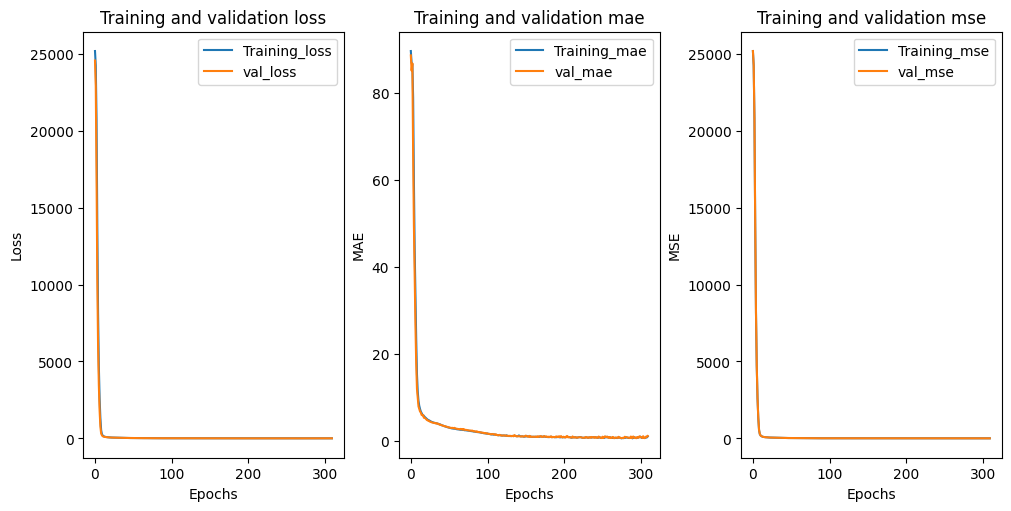

In [49]:
plot_history(history)

In [50]:
loss_mae_mse_df = pd.DataFrame(((loss[i], val_loss[i], mae[i], val_mae[i],  mse[i], val_mse[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'MAE', 'Val_MAE', 'MSE', 'Val_MSE'])
loss_mae_mse_df

,Loss,Val_Loss,MAE,Val_MAE,MSE,Val_MSE
0,25183.558594,24565.787109,89.715698,88.715881,25183.558594,25183.558594
1,24237.900391,22898.775391,86.970070,85.211578,24237.900391,24237.900391
2,20779.548828,17219.091797,86.778954,86.848526,20779.548828,20779.548828
3,13886.784180,10397.110352,79.044533,66.230774,13886.784180,13886.784180
4,8183.525879,6057.403320,59.827450,49.672142,8183.525879,8183.525879
...,...,...,...,...,...,...
305,1.378640,1.212779,0.751950,0.684646,1.378640,1.378640
306,1.506247,1.961148,0.758560,0.834911,1.506247,1.506247
307,2.122328,2.605389,0.905757,1.055354,2.122328,2.122328
308,1.848979,3.072570,0.867419,0.999726,1.848979,1.848979


In [51]:
loss_mae_mse_df.to_csv('Loss_Mae_Mse_df.csv', index = True)

In [52]:
model.evaluate(test_scale, test_output)
model.evaluate(train_scale, train_output)
model.evaluate(val_scale, val_output)

7/7 [==============================] - 0s 15ms/step - loss: 3.8799 - mae: 1.1041 - mse: 3.8799


2024-03-11 16:08:51.266589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 10ms/step - loss: 4.1918 - mae: 1.1783 - mse: 4.1918


[4.191812038421631, 1.178317904472351, 4.191812038421631]

In [53]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)

11/20 [===============>..............] - ETA: 0s

2024-03-11 16:08:51.910562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 5ms/step


In [54]:
predicted_test_df = pd.DataFrame(predicted_test)
predicted_train_df = pd.DataFrame(predicted_train)
predicted_val_df = pd.DataFrame(predicted_val)

In [55]:
predicted_test_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_train_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_val_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']

In [56]:
predicted_test_df.index = test_output.index
predicted_train_df.index = train_output.index
predicted_val_df.index = val_output.index

In [57]:
def DataFrame(predicted_df, df_outuput, output_df):
   for i in range(8):
      predicted_df.insert(2*i+1, df_outuput.columns[i], output_df.iloc[:, [i]])
   predicted_df

In [58]:
DataFrame(predicted_test_df, test_output, test_output)


In [59]:
DataFrame(predicted_train_df, train_output, train_output)

In [60]:
DataFrame(predicted_val_df, val_output, val_output)

In [61]:
predicted_test_df.to_csv("Predicted_result.csv")

In [62]:
predicted_train_df.to_csv("Predicted_train_result.csv")

In [63]:
predicted_val_df.to_csv("Predicted_val_result.csv")

In [64]:
#R2_score
def R2_score(predicted_true):
    list = []
    metrics = tf.keras.metrics.R2Score()
    for i in range(8):
        metrics.update_state(predicted_true.iloc[:, [2*i+1]], predicted_true.iloc[:, [2*i]])
        result = metrics.result()
        list.append(result.numpy())

    return list

In [65]:
print(R2_score(predicted_test_df))
print(R2_score(predicted_train_df))
print(R2_score(predicted_val_df))

[0.98875785, 0.9964024, 0.99849445, 0.9985239, 0.9983099, 0.9997606, 0.999769, 0.99976164]
[0.9907031, 0.9964672, 0.9985351, 0.9985461, 0.998355, 0.9997913, 0.9997988, 0.9997949]
[0.9863218, 0.99600905, 0.9982969, 0.9983372, 0.99811065, 0.9997491, 0.9997583, 0.9997524]


In [66]:
R2_score_df = pd.DataFrame((R2_score(predicted_test_df), R2_score(predicted_train_df), R2_score(predicted_val_df)), columns = ['Maximum Pressure', 'Crank Angle at Maximum Pressure', 'Maximum Rate of Pressure Rise', 'BMEP','IMEP', 'BSFC', 'BSNOx', 'BSCO'], index = ['Test', 'Train', 'Validation'])
R2_score_df

,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO
Test,0.988758,0.996402,0.998494,0.998524,0.998310,0.999761,0.999769,0.999762
Train,0.990703,0.996467,0.998535,0.998546,0.998355,0.999791,0.999799,0.999795
Validation,0.986322,0.996009,0.998297,0.998337,0.998111,0.999749,0.999758,0.999752


In [67]:
R2_score_df.to_csv('R2_score.csv')

In [74]:
from sklearn.model_selection import ParameterGrid

# 하이퍼파라미터 그리드 정의
param_grid = {
    'dropout_rate': [0.1 ,0.2, 0.3,],
    'learning_rate': [0.001, 0.01, 0.1],
    'hidden_layers': [1, 2, 3],
    'hidden_units': [128, 64, 32],
    'batch_size' : [32, 16, 8]
}

# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행

best_mse = float('inf')
best_params = {}

for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['hidden_units'], activation='relu', input_shape=(9, )))
    model.add(keras.layers.Dropout(rate=params['dropout_rate']))
    
    for _ in range(params['hidden_layers']):
        model.add(keras.layers.Dense(params['hidden_units'], activation='relu'))
        model.add(keras.layers.Dropout(rate=params['dropout_rate']))
    
    model.add(keras.layers.Dense(8))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, batch_size = params['batch_size'], validation_data=(val_scale, val_output), epochs=1000, callbacks=[callback, checkpoint_cb], verbose=0)
    
    # 검증 세트에 대한 평가
    metrics = model.evaluate(val_scale, val_output, verbose=0)
    print("Validation MAE :", metrics[0])
    print("Validation MSE :", metrics[1])
    
    # 최적의 하이퍼파라미터와 MAE 업데이트
    if metrics[1] < best_mse:
        best_mse = metrics[1]
        best_params = params


    # 최적의 하이퍼파라미터 저장    
    model.save_weights('best-multiregression-hyperparameters.h5')
print("Best parameters:", best_params)
print("Best validation MAE:", best_mse)


Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 18:59:41.227137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 18:59:42.072945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 215: early stopping
Validation MAE : 180.35110473632812
Validation MSE : 10.191083908081055
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:00:40.831936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:00:41.651392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 60: early stopping
Validation MAE : 5914.4619140625
Validation MSE : 50.48917007446289
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:00:58.411558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:00:59.205279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 48: early stopping
Validation MAE : 1130.069091796875
Validation MSE : 22.557313919067383
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:01:12.341794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:01:15.297719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 275: early stopping
Validation MAE : 111.63640594482422
Validation MSE : 6.317793369293213
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:02:27.915030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:02:28.691037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
Validation MAE : 695.572265625
Validation MSE : 16.476024627685547
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:02:40.133130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:02:40.990222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 583.4716186523438
Validation MSE : 19.884523391723633
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:02:48.832144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:02:49.978716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 324: early stopping
Validation MAE : 139.083984375
Validation MSE : 6.854597568511963
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:04:16.757442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:04:17.592542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 119: early stopping
Validation MAE : 106.02143859863281
Validation MSE : 5.878716945648193
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:04:49.068956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:04:50.033643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
Validation MAE : 459.9885559082031
Validation MSE : 15.200516700744629
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:04:58.129138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:04:59.322868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 55: early stopping
Validation MAE : 4735.83154296875
Validation MSE : 48.130245208740234
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:05:17.409995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:05:18.567526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 39: early stopping
Validation MAE : 5023.91796875
Validation MSE : 44.498023986816406
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:05:31.457274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:05:32.731661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 24348386.0
Validation MSE : 3569.527099609375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:05:40.563569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:05:41.793738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 102: early stopping
Validation MAE : 41019.1875
Validation MSE : 150.5074005126953
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:06:13.094219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:06:14.300557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 43: early stopping
Validation MAE : 2181.268310546875
Validation MSE : 31.022052764892578
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:06:27.747334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:06:29.121307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 6151.53515625
Validation MSE : 54.595947265625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:06:37.430386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:06:38.642504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 146: early stopping
Validation MAE : 368.9427795410156
Validation MSE : 13.89500617980957
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:07:22.512782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:07:23.764034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 36: early stopping
Validation MAE : 4612.4501953125
Validation MSE : 50.50625991821289
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:07:35.420796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:07:36.557242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
Validation MAE : 14578659.0
Validation MSE : 3342.657470703125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:07:49.560505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:07:51.180089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 542828.3125
Validation MSE : 529.0678100585938
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:07:59.484096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:08:00.948534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 56: early stopping
Validation MAE : 44313.36328125
Validation MSE : 159.005615234375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:08:20.253906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:08:21.750398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 308810976.0
Validation MSE : 12046.521484375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:08:29.755270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:08:31.451894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 197569.59375
Validation MSE : 314.0386962890625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:08:40.349511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:08:43.707352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 59: early stopping
Validation MAE : 169345.265625
Validation MSE : 307.81231689453125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:09:05.380426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:09:07.017039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 278936.53125
Validation MSE : 447.0036315917969
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:09:15.186795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:09:16.734665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 80768.109375
Validation MSE : 218.6837158203125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:09:26.722872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:09:28.188777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 47: early stopping
Validation MAE : 5236.58837890625
Validation MSE : 39.55767822265625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:09:44.910526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:09:46.619281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 31: early stopping
Validation MAE : 42363.96875
Validation MSE : 104.22421264648438
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:09:57.690570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:09:58.868658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 234: early stopping
Validation MAE : 2026.3837890625
Validation MSE : 30.82889747619629
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:11:02.699656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:11:03.808056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 35: early stopping
Validation MAE : 505.3924865722656
Validation MSE : 15.29822063446045
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:11:13.794776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:11:14.931503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 3351.3828125
Validation MSE : 44.527950286865234
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:11:22.632938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:11:23.968025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 231: early stopping
Validation MAE : 27209.306640625
Validation MSE : 78.2579345703125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:12:27.460491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:12:28.763944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 64: early stopping
Validation MAE : 1560.4119873046875
Validation MSE : 21.55169105529785
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:12:46.441711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:12:47.722965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 27: early stopping
Validation MAE : 1498.4443359375
Validation MSE : 23.157712936401367
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:12:56.116925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:12:57.267780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 282: early stopping
Validation MAE : 714.6819458007812
Validation MSE : 13.96703052520752
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:14:12.906714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:14:14.112766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 69: early stopping
Validation MAE : 2080.809814453125
Validation MSE : 23.59025001525879
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:14:34.363632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:14:35.438100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 728.57763671875
Validation MSE : 15.617918968200684
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:14:43.355707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:14:44.772985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 58: early stopping
Validation MAE : 271098.90625
Validation MSE : 327.86920166015625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:15:02.654401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:15:04.217467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 10492.1708984375
Validation MSE : 75.33401489257812
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:15:13.598146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:15:15.311412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 291427.9375
Validation MSE : 467.3056335449219
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:15:22.657364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:15:24.604120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 72: early stopping
Validation MAE : 13677.7900390625
Validation MSE : 71.52909851074219
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:15:46.346037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:15:47.761179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 853.453125
Validation MSE : 24.056686401367188
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:15:59.762325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:16:01.520706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 41: early stopping
Validation MAE : 82074688.0
Validation MSE : 7064.822265625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:16:14.346455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:16:15.780641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 80: early stopping
Validation MAE : 969.4068603515625
Validation MSE : 16.758420944213867
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:16:39.715294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:16:41.411106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 33: early stopping
Validation MAE : 4907.66015625
Validation MSE : 50.50724792480469
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:16:51.528515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:16:53.264152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
Validation MAE : 11956.98828125
Validation MSE : 86.48064422607422
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:17:02.285665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:17:04.085724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 8760071.0
Validation MSE : 2003.4404296875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:17:12.307880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:17:14.306360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 70: early stopping
Validation MAE : 14438959.0
Validation MSE : 2546.58740234375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:17:40.258916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:17:42.218620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 2766091059200.0
Validation MSE : 1024900.8125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:17:50.749235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:17:52.706440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 1065152.625
Validation MSE : 800.0436401367188
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:18:01.517699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:18:03.399194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 3266264.25
Validation MSE : 1220.064208984375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:18:11.308167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:18:13.195352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 35: early stopping
Validation MAE : 154761712.0
Validation MSE : 11006.9873046875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:18:25.720556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:18:27.495158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 38298.4140625
Validation MSE : 133.87203979492188
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:18:36.622922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:18:38.673012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 285511.625
Validation MSE : 332.80755615234375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:18:46.889012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:18:49.081270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 54388276.0
Validation MSE : 6176.54248046875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:19:01.545183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:19:02.895882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 209: early stopping
Validation MAE : 597.9906616210938
Validation MSE : 16.36578941345215
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:19:58.032335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:19:59.569386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 32: early stopping
Validation MAE : 572.2999267578125
Validation MSE : 15.09502124786377
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:20:08.881773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:20:10.512936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 1327.19775390625
Validation MSE : 25.345237731933594
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:20:18.067091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:20:19.530205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 196: early stopping
Validation MAE : 170.470458984375
Validation MSE : 8.090666770935059
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:21:13.924655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:21:16.385381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 56: early stopping
Validation MAE : 478.67950439453125
Validation MSE : 14.691408157348633
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:21:32.732221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:21:34.253570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 218.95704650878906
Validation MSE : 10.442352294921875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:21:43.956187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:21:45.522649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 330: early stopping
Validation MAE : 408.70458984375
Validation MSE : 11.203551292419434
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:23:14.918419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:23:16.495515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 58: early stopping
Validation MAE : 1258.1837158203125
Validation MSE : 20.678022384643555
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:23:36.306469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:23:38.231209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 43: early stopping
Validation MAE : 2070.813720703125
Validation MSE : 30.870075225830078
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:23:50.636277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:23:52.520056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 78: early stopping
Validation MAE : 84388.0078125
Validation MSE : 207.59764099121094
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:24:17.725601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:24:19.723414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 46: early stopping
Validation MAE : 23154.490234375
Validation MSE : 107.6912612915039
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:24:37.161609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:24:39.776043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1124668288.0
Validation MSE : 23706.5546875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:24:47.305644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:24:49.096739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 64: early stopping
Validation MAE : 25509.302734375
Validation MSE : 90.65367889404297
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:25:08.649478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:25:10.436522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 36: early stopping
Validation MAE : 7342.55029296875
Validation MSE : 50.10987854003906
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:25:21.833212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:25:23.520680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 3178817.5
Validation MSE : 1394.9453125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:25:31.652581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:25:33.436384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 159: early stopping
Validation MAE : 17615.51171875
Validation MSE : 61.87061309814453
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:26:20.166837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:26:21.967487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 62: early stopping
Validation MAE : 14630.140625
Validation MSE : 63.08774948120117
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:26:42.416593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:26:44.292701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 30: early stopping
Validation MAE : 10747.4541015625
Validation MSE : 77.93187713623047
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:26:54.653988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:26:56.774524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 29874092.0
Validation MSE : 4228.900390625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:27:05.434646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:27:07.603988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 75: early stopping
Validation MAE : 153492.625
Validation MSE : 260.96197509765625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:27:33.352734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:27:35.479675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 477347060908032.0
Validation MSE : 17696826.0
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:27:43.745083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:27:45.790311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 2068107.75
Validation MSE : 1086.70703125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:27:55.174642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:27:57.409717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 15261.400390625
Validation MSE : 77.74606323242188
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:28:08.037749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:28:10.204419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1191003553792.0
Validation MSE : 856590.5625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:28:18.671816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:28:20.983245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 16787.166015625
Validation MSE : 88.89788055419922
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:28:30.649158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:28:32.758398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 5625782.5
Validation MSE : 1452.285400390625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:28:40.878104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:28:43.024878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 31: early stopping
Validation MAE : 9533703168.0
Validation MSE : 77899.921875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:28:54.330551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:28:57.290357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 154: early stopping
Validation MAE : 3769.0263671875
Validation MSE : 44.18703079223633
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:30:12.000406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:30:13.842216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 44: early stopping
Validation MAE : 4527.69873046875
Validation MSE : 49.84762954711914
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:30:35.824021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:30:37.663732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 3368.5185546875
Validation MSE : 41.140625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:30:49.572253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:30:51.590916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 209: early stopping
Validation MAE : 34269.07421875
Validation MSE : 99.5440902709961
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:32:31.334485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:32:33.124670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 64: early stopping
Validation MAE : 2089.293212890625
Validation MSE : 27.435653686523438
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:33:03.849099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:33:05.644351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 35: early stopping
Validation MAE : 191.48455810546875
Validation MSE : 9.850584983825684
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:33:23.314993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:33:25.473876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 212: early stopping
Validation MAE : 274.1380310058594
Validation MSE : 8.361749649047852
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:35:13.715636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:35:15.596589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 64: early stopping
Validation MAE : 1517.3787841796875
Validation MSE : 20.17106056213379
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:35:47.749404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:35:49.590548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 54: early stopping
Validation MAE : 10333.455078125
Validation MSE : 78.41761016845703
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:36:16.079409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:36:18.250180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 48: early stopping
Validation MAE : 166682.90625
Validation MSE : 252.958740234375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:36:45.624496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:36:48.080415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 1447.892578125
Validation MSE : 28.97817039489746
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:37:09.701521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:37:12.157430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 49: early stopping
Validation MAE : 154111.609375
Validation MSE : 283.5399169921875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:37:39.174511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:37:41.734150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 45: early stopping
Validation MAE : 272718.90625
Validation MSE : 386.478271484375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:38:05.916218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:38:08.886626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 41: early stopping
Validation MAE : 21010.00390625
Validation MSE : 98.69412994384766
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:38:32.714289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:38:38.132373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
Validation MAE : 12018454.0
Validation MSE : 3000.86181640625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:38:55.176128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:38:57.806687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 114: early stopping
Validation MAE : 23457.712890625
Validation MSE : 88.03174591064453
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:40:02.035145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:40:04.575841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 30: early stopping
Validation MAE : 558.6267700195312
Validation MSE : 14.964944839477539
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:40:21.445923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:40:24.552797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 31: early stopping
Validation MAE : 1146836.25
Validation MSE : 896.6924438476562
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:40:43.140172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:40:47.313326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 5832543.0
Validation MSE : 1734.16943359375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:41:02.334354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:41:05.237782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 37: early stopping
Validation MAE : 1905458.875
Validation MSE : 1023.9059448242188
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:41:29.452659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:41:32.457769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 68205548666880.0
Validation MSE : 5048706.0
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:41:46.747089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:41:49.942278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 5459167.5
Validation MSE : 1635.4012451171875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:42:04.425044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:42:07.763183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 49: early stopping
Validation MAE : 4814685.5
Validation MSE : 1701.5494384765625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:42:39.138510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:42:42.114449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 485711904.0
Validation MSE : 14950.0751953125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:42:56.467645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:43:00.330725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 1599080.375
Validation MSE : 865.9523315429688
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:43:16.432673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:43:19.218178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 17898.650390625
Validation MSE : 89.68911743164062
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:43:41.287541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:43:44.886572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1048070.9375
Validation MSE : 760.9525146484375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:43:59.611278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:44:02.125247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 142: early stopping
Validation MAE : 1648.972900390625
Validation MSE : 30.381006240844727
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:45:19.821760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:45:22.864978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
Validation MAE : 5357.77294921875
Validation MSE : 49.595069885253906
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:45:37.856926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:45:40.487080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 10530.525390625
Validation MSE : 64.84385681152344
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:45:53.204704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:45:55.721842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 106: early stopping
Validation MAE : 18534.125
Validation MSE : 92.6530990600586
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:46:45.466531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:46:47.948332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 40: early stopping
Validation MAE : 3002.69189453125
Validation MSE : 34.560333251953125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:47:07.709527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:47:10.504457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 1768.9453125
Validation MSE : 31.15762710571289
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:47:22.960909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:47:25.680456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 139: early stopping
Validation MAE : 586.4119262695312
Validation MSE : 13.354686737060547
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:48:31.917436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:48:34.852312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 114: early stopping
Validation MAE : 1605.125244140625
Validation MSE : 18.821640014648438
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:49:29.377430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:49:32.101739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 1314.7591552734375
Validation MSE : 22.454160690307617
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:49:45.512329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:49:48.980968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 64: early stopping
Validation MAE : 1273273.375
Validation MSE : 716.9945678710938
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:50:23.489819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:50:26.891367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 35: early stopping
Validation MAE : 26359.326171875
Validation MSE : 117.47657775878906
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:50:46.387375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:50:49.696136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 56: early stopping
Validation MAE : 966722.875
Validation MSE : 711.1939697265625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:51:23.523737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:51:26.814411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 44: early stopping
Validation MAE : 298885.1875
Validation MSE : 385.66839599609375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:51:52.546092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:51:55.686052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 1992.620849609375
Validation MSE : 31.812057495117188
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:52:15.379624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:52:18.529694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 4335.6689453125
Validation MSE : 55.571964263916016
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:52:32.917202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:52:35.933696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 68: early stopping
Validation MAE : 15333.181640625
Validation MSE : 83.32328033447266
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:53:12.512447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:53:15.912955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 53957.0859375
Validation MSE : 153.03109741210938
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:53:31.921809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:53:34.760334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
Validation MAE : 1198070.25
Validation MSE : 777.2620849609375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:53:52.150371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:53:56.166764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 551149312.0
Validation MSE : 18101.09375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:54:11.052127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:54:14.938365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 73: early stopping
Validation MAE : 25272.255859375
Validation MSE : 124.00167846679688
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:55:01.125660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:55:05.147997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 629798435028992.0
Validation MSE : 16007770.0
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:55:27.548511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:55:32.733933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 36507720.0
Validation MSE : 4555.0927734375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 19:55:48.657223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:55:52.516908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 26516790.0
Validation MSE : 3615.37939453125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 19:56:06.784121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:56:10.329570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 5218342273024.0
Validation MSE : 1761803.75
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 19:56:24.694641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:56:28.242392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 50: early stopping
Validation MAE : 5901852.0
Validation MSE : 1806.4803466796875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 19:56:59.584443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:57:03.421934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 535386.0625
Validation MSE : 526.188720703125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 19:57:18.961600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:57:23.059283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 976824448.0
Validation MSE : 25656.00390625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 19:57:40.247273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:57:43.232857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 139: early stopping
Validation MAE : 60747.30078125
Validation MSE : 167.6853485107422
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 19:58:48.157194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:58:51.145750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 31: early stopping
Validation MAE : 1606.7127685546875
Validation MSE : 29.744613647460938
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 19:59:06.896521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:59:09.791300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 6084.79296875
Validation MSE : 66.71086120605469
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 19:59:23.137755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 19:59:26.018852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 152: early stopping
Validation MAE : 741.4163208007812
Validation MSE : 17.632524490356445
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 20:00:36.190814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:00:39.066068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 55: early stopping
Validation MAE : 427.4872741699219
Validation MSE : 12.413904190063477
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 20:01:06.071979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:01:09.039277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 2084.0615234375
Validation MSE : 30.76270294189453
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 20:01:21.254454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:01:24.167308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 268: early stopping
Validation MAE : 1523.43017578125
Validation MSE : 19.703882217407227
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 20:03:26.816825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:03:29.870047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 47: early stopping
Validation MAE : 35720.73046875
Validation MSE : 92.05049133300781
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 20:03:52.771996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:03:55.802948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 1149.9571533203125
Validation MSE : 23.638578414916992
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 20:04:10.768711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:04:14.635605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 78: early stopping
Validation MAE : 629929.9375
Validation MSE : 596.4006958007812
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 20:04:57.341217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:05:00.688704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 39: early stopping
Validation MAE : 36203.99609375
Validation MSE : 129.4552764892578
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 20:05:23.083363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:05:26.448821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 193470576.0
Validation MSE : 10861.59375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 20:05:39.121557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:05:42.503462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 88: early stopping
Validation MAE : 307483.5625
Validation MSE : 357.0784912109375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 20:06:30.258766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:06:33.809986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 176152.5
Validation MSE : 304.1099853515625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 20:06:55.508586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:06:59.244473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 33: early stopping
Validation MAE : 2848542208.0
Validation MSE : 41072.74609375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 20:07:18.694187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:07:22.340906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 74: early stopping
Validation MAE : 373708.3125
Validation MSE : 308.21051025390625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 20:08:03.128150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:08:06.708488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 5603.71484375
Validation MSE : 46.331241607666016
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 20:08:23.253561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:08:27.052020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 41: early stopping
Validation MAE : 962482.6875
Validation MSE : 932.293212890625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 20:08:50.830575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:08:55.764175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 195376448.0
Validation MSE : 9238.6171875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 20:09:10.990839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:09:15.434641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 66: early stopping
Validation MAE : 254739.046875
Validation MSE : 382.54083251953125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 20:09:59.629211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:10:05.022941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 270688032129024.0
Validation MSE : 12414483.0
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 20:10:21.798797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:10:26.142031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 18648702.0
Validation MSE : 2959.211669921875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 20:10:42.070705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:10:46.606181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 55: early stopping
Validation MAE : 757139.5
Validation MSE : 655.8931884765625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 20:11:25.460220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:11:30.374856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 5563181170688.0
Validation MSE : 1961778.5
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 20:11:45.464876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:11:49.633066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 50: early stopping
Validation MAE : 971328.0625
Validation MSE : 597.298095703125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 20:12:22.214246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:12:26.334414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 59073.78125
Validation MSE : 126.73096466064453
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 20:12:52.385710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:12:56.873253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 44: early stopping
Validation MAE : 18919032832.0
Validation MSE : 94596.8046875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 20:13:26.820112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:13:32.657063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 92: early stopping
Validation MAE : 9813.6982421875
Validation MSE : 74.99673461914062
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 20:14:57.863201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:15:01.644999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 8554.259765625
Validation MSE : 51.289485931396484
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 20:15:23.398665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:15:26.869442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 1444.89990234375
Validation MSE : 28.01468276977539
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 20:15:49.842760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:15:54.011914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 122: early stopping
Validation MAE : 2819.348388671875
Validation MSE : 36.647247314453125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 20:17:46.632990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:17:50.763220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 4403.12841796875
Validation MSE : 33.75542068481445
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 20:18:15.101279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:18:18.692039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 525.0177612304688
Validation MSE : 14.7633695602417
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 20:18:42.386995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:18:46.555751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 199: early stopping
Validation MAE : 1151.70361328125
Validation MSE : 18.251827239990234
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 20:21:51.188901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:21:54.885268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 33: early stopping
Validation MAE : 771.1912231445312
Validation MSE : 21.049158096313477
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 20:22:25.785477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:22:29.430643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 872.16796875
Validation MSE : 18.814477920532227
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 20:22:51.348633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:22:55.532033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 72: early stopping
Validation MAE : 283592.65625
Validation MSE : 359.15277099609375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 20:24:10.278347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:24:14.846754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 50: early stopping
Validation MAE : 7757.29248046875
Validation MSE : 60.42850112915039
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 20:25:07.375094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:25:12.433132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 41: early stopping
Validation MAE : 429004.90625
Validation MSE : 569.0291748046875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 20:25:55.395214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:26:00.115486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 41: early stopping
Validation MAE : 321259.375
Validation MSE : 308.90411376953125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 20:26:42.958120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:26:47.644910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 57: early stopping
Validation MAE : 4937.671875
Validation MSE : 40.68109893798828
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 20:27:48.025996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:27:52.913644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 68: early stopping
Validation MAE : 6126.2392578125
Validation MSE : 67.50725555419922
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 20:29:03.404949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:29:07.997487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 57: early stopping
Validation MAE : 135706.1875
Validation MSE : 250.16807556152344
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 20:30:07.438084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:30:12.046716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 60: early stopping
Validation MAE : 1238.4620361328125
Validation MSE : 23.902000427246094
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 20:31:14.396848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:31:18.704591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 27: early stopping
Validation MAE : 2817.283447265625
Validation MSE : 33.47898483276367
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 20:31:48.304847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:31:53.266431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 680709248.0
Validation MSE : 16858.833984375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 20:32:19.142177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:32:24.289837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 52: early stopping
Validation MAE : 117731.8984375
Validation MSE : 263.78692626953125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 20:33:24.704567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:33:29.832049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 56: early stopping
Validation MAE : 308383580160.0
Validation MSE : 276375.6875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 20:34:36.189411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:34:41.400762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 40: early stopping
Validation MAE : 13336117.0
Validation MSE : 2348.012939453125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 20:35:28.961665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:35:34.224156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 4436.72021484375
Validation MSE : 48.14543914794922
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 20:36:07.660652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:36:12.963025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 65: early stopping
Validation MAE : 303339040.0
Validation MSE : 11310.537109375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 20:37:28.325992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:37:33.693095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 10156306.0
Validation MSE : 2121.947265625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 20:38:00.539625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:38:05.892421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1081852.125
Validation MSE : 734.9114379882812
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 20:38:31.431094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:38:37.045911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 65600660.0
Validation MSE : 5448.8017578125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 20:39:03.386088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:39:07.966083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 80: early stopping
Validation MAE : 18852.525390625
Validation MSE : 89.9626693725586
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 20:40:20.566701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:40:24.061236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 14793.76953125
Validation MSE : 85.30437469482422
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 20:40:48.849180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:40:54.416378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 51: early stopping
Validation MAE : 4402.03466796875
Validation MSE : 48.1902961730957
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 20:41:46.721121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:41:51.516305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 95: early stopping
Validation MAE : 46040.296875
Validation MSE : 148.91090393066406
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 20:43:19.395391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:43:23.296531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 7279.00830078125
Validation MSE : 61.035972595214844
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 20:43:50.432237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:43:54.643904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 4920.96826171875
Validation MSE : 41.980377197265625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 20:44:16.724407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:44:20.553999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 177: early stopping
Validation MAE : 17289.9453125
Validation MSE : 84.73828125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 20:46:59.155242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:47:03.130419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 40: early stopping
Validation MAE : 57126.6484375
Validation MSE : 139.0790252685547
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 20:47:40.839385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:47:44.997681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 40: early stopping
Validation MAE : 210.93710327148438
Validation MSE : 8.348642349243164
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 20:48:22.331857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:48:26.949189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 79: early stopping
Validation MAE : 1266778.875
Validation MSE : 824.9426879882812
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 20:49:49.446922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:49:54.537408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 35: early stopping
Validation MAE : 16346.60546875
Validation MSE : 105.03986358642578
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 20:50:31.728271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:50:36.440900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 31: early stopping
Validation MAE : 2746611.5
Validation MSE : 1286.0997314453125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 20:51:09.092822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:51:14.083926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 102: early stopping
Validation MAE : 1083275.375
Validation MSE : 588.6363525390625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 20:52:57.597459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:53:02.878913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 46623.609375
Validation MSE : 158.59107971191406
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 20:53:42.759655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:53:47.598883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 37: early stopping
Validation MAE : 14637.775390625
Validation MSE : 92.74256896972656
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 20:54:27.354556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:54:32.022009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 73: early stopping
Validation MAE : 2349454.0
Validation MSE : 994.4430541992188
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 20:55:46.877357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:55:51.813397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 27: early stopping
Validation MAE : 1211643.75
Validation MSE : 782.98779296875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 20:56:20.813831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:56:25.787410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 2022.3934326171875
Validation MSE : 33.09292984008789
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 20:57:01.775314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:57:08.062008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 2466308096.0
Validation MSE : 36373.796875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 20:57:34.152367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:57:39.509631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 46: early stopping
Validation MAE : 193725.796875
Validation MSE : 342.41168212890625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 20:58:34.049592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:58:39.656439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 84808105459712.0
Validation MSE : 7283102.0
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 20:59:05.754276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:59:11.473357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1398693888.0
Validation MSE : 25326.05859375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 20:59:37.437294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 20:59:43.155683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 87: early stopping
Validation MAE : 58887000.0
Validation MSE : 4765.13330078125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 21:01:24.872459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:01:32.100865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 37: early stopping
Validation MAE : 4383360000.0
Validation MSE : 44297.06640625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 21:02:16.453127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:02:22.158252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 61426704.0
Validation MSE : 5764.19970703125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 21:02:49.935271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:02:55.849854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 76: early stopping
Validation MAE : 12628.5224609375
Validation MSE : 80.40465545654297
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 21:04:28.796585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:04:35.116243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 3108712192.0
Validation MSE : 49346.2578125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 21:05:04.966200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:05:09.685168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 85: early stopping
Validation MAE : 28330.818359375
Validation MSE : 107.78339385986328
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 21:06:28.362160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:06:32.750732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 5526.34228515625
Validation MSE : 51.45641326904297
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 21:06:57.117432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:07:01.020062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 39: early stopping
Validation MAE : 18481.8984375
Validation MSE : 90.56842041015625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 21:07:37.480955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:07:42.053158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 106: early stopping
Validation MAE : 24808.90625
Validation MSE : 116.1592788696289
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 21:09:15.826267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:09:20.023904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 4470.4892578125
Validation MSE : 46.488624572753906
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 21:09:42.964227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:09:47.748081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 9650.60546875
Validation MSE : 70.85757446289062
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 21:10:10.231659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:10:14.624948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 115: early stopping
Validation MAE : 19555.236328125
Validation MSE : 72.7573013305664
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 21:11:57.508899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:12:01.996477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
Validation MAE : 8323.57421875
Validation MSE : 45.979122161865234
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 21:12:40.579189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:12:44.999373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 218.34620666503906
Validation MSE : 10.521278381347656
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 21:13:10.352302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:13:16.269672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 92: early stopping
Validation MAE : 42671.12109375
Validation MSE : 150.75851440429688
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 21:14:53.603049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:14:59.617218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 33: early stopping
Validation MAE : 5103.04296875
Validation MSE : 46.75715255737305
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 21:15:35.892915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:15:42.294949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 41: early stopping
Validation MAE : 2481482.0
Validation MSE : 1363.2928466796875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 21:16:25.934947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:16:31.493335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 75: early stopping
Validation MAE : 1916878.375
Validation MSE : 993.7119750976562
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 21:17:48.515415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:17:53.575958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 30: early stopping
Validation MAE : 18602.1171875
Validation MSE : 101.5759048461914
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 21:18:26.390902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:18:33.391620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 75: early stopping
Validation MAE : 24845.55078125
Validation MSE : 135.70779418945312
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 21:19:50.378393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:19:56.779323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 67: early stopping
Validation MAE : 2031568.875
Validation MSE : 1030.696044921875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 21:21:05.920187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:21:12.664450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 41: early stopping
Validation MAE : 7393.24365234375
Validation MSE : 59.75006866455078
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 21:21:57.921510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:22:05.113891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 27: early stopping
Validation MAE : 109509592.0
Validation MSE : 7753.41943359375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-11 21:22:35.748327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:22:44.825617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1049964864.0
Validation MSE : 22160.5546875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-11 21:23:13.094345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:23:21.550856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 1045155.125
Validation MSE : 676.1525268554688
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-11 21:23:57.721383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:24:06.432695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1734477479936.0
Validation MSE : 1009133.5
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-11 21:24:34.112794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:24:42.025852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 128297608.0
Validation MSE : 8214.5400390625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-11 21:25:09.443113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:25:18.181265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 40: early stopping
Validation MAE : 6221999.0
Validation MSE : 1901.5616455078125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-11 21:26:11.982148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:26:22.117277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 59459035136.0
Validation MSE : 191973.546875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-11 21:26:51.556099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:27:00.254471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 44: early stopping
Validation MAE : 4230527.0
Validation MSE : 1487.6905517578125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-11 21:27:55.089654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:28:01.703444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 1316144.125
Validation MSE : 824.6380004882812
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-11 21:28:43.910991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-11 21:28:52.071610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 16599946240.0
Validation MSE : 111794.9453125
Best parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}
Best validation MAE: 5.878716945648193


In [75]:
data = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_mse]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_MSE'])
grid_result.to_csv('Regression_GridSearch_Result')
grid_result

,Best_Hyperparameters
Batch_Size,32.000000
Dropout_Rate,0.100000
Hidden_Layers,1.000000
Hidden_Units,32.000000
Learning_Rate,0.010000
Best_MSE,5.878717
